<a href="https://colab.research.google.com/github/Overleaff/Image_processing/blob/main/Chap3_1_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Task**






In [ ]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/Overleaff/image/main/IMG_20190727_011317.jpg
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/landscape/pexels-aleksandar-pasaric-2341830.jpg

image_path = "pexels-aleksandar-pasaric-2341830.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2290k  100 2290k    0     0  4761k      0 --:--:-- --:--:-- --:--:-- 4761k


(3997, 5996, 3)
Resized Dimensions :  (4756, 7135, 3)


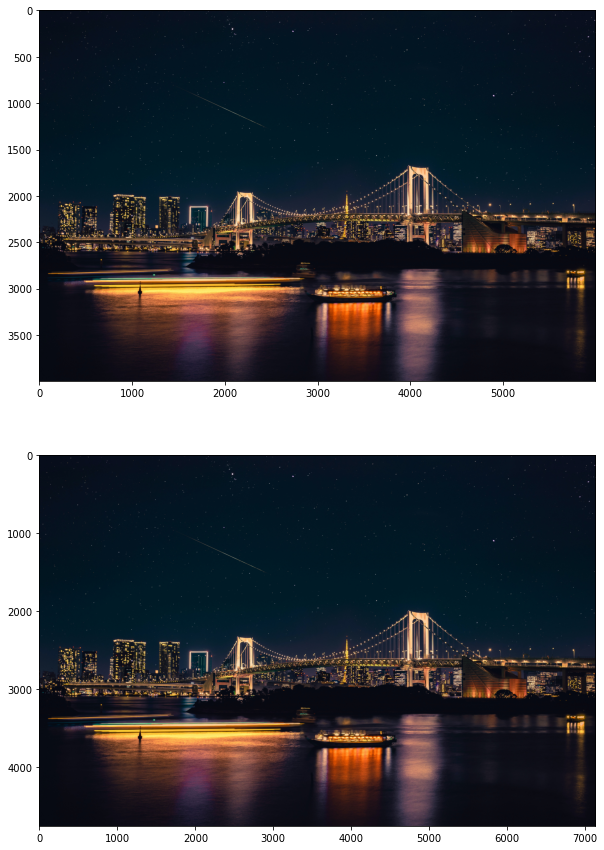

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread(image_path)

RGBimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#resize
scale_percent = 119 # percent of original size
width = int(RGBimage.shape[1] * scale_percent / 100)
height = int(RGBimage.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(RGBimage, dim, interpolation = cv2.INTER_NEAREST) # test lai tren pycharm de thay su khac nhau
print(RGBimage.shape)
print('Resized Dimensions : ',resized.shape)
###

f, axarr = plt.subplots(2,1) 
f.set_figheight(15)
f.set_figwidth(15)
axarr[0].imshow(RGBimage)
axarr[1].imshow(resized)
plt.show()

# **Basic gray level transformations**

In [ ]:
!pip3 install numpy

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/landscape/pexels-eberhard-grossgasteiger-1287089.jpg

gray_path = "pexels-eberhard-grossgasteiger-1287089.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2238k  100 2238k    0     0  9691k      0 --:--:-- --:--:-- --:--:-- 9691k


[[242 242 242 ... 241 241 241]
 [242 242 242 ... 241 241 241]
 [242 242 242 ... 241 241 241]
 ...
 [ 73  74  57 ...  28  41  50]
 [ 93  63  59 ...  47  39  58]
 [ 94  70  56 ...  55  34  39]]
[[175.39667861 175.39667861 175.39667861 ... 174.67189895 174.67189895
  174.67189895]
 [175.39667861 175.39667861 175.39667861 ... 174.67189895 174.67189895
  174.67189895]
 [175.39667861 175.39667861 175.39667861 ... 174.67189895 174.67189895
  174.67189895]
 ...
 [ 52.90891545  53.63369511  41.31244083 ...  20.29383058  29.71596621
   36.23898318]
 [ 67.40450872  45.66111881  42.76200016 ...  34.06464419  28.26640688
   42.03722049]
 [ 68.12928839  50.73457646  40.58766117 ...  39.8628815   24.64250857
   28.26640688]]


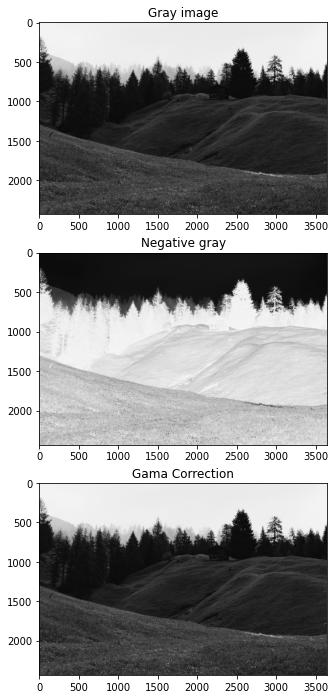

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

#initialize array subplot
size = 3
f, axarr = plt.subplots(size,1) 
f.set_figheight(size * 4)
f.set_figwidth(size * 4)
####
gray_ori = cv2.imread(gray_path)
gray_ori = cv2.cvtColor(gray_ori, cv2.COLOR_BGR2GRAY)

axarr[0].imshow(gray_ori, cmap='gray')
axarr[0].title.set_text('Gray image')
####
gray_negative = abs(255-gray_ori)
axarr[1].imshow(gray_negative, cmap='gray')
axarr[1].title.set_text('Negative gray')
####
gamma_correction = np.multiply(gray_ori, 0.2**0.2)
print(gray_ori)
print(gamma_correction)
axarr[2].imshow(gamma_correction, cmap='gray')
axarr[2].title.set_text('Gama Correction')

plt.show()

# Image Histogram

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/landscape/sunFlower.jpg

hist_path = "sunFlower.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12739  100 12739    0     0   112k      0 --:--:-- --:--:-- --:--:--  111k


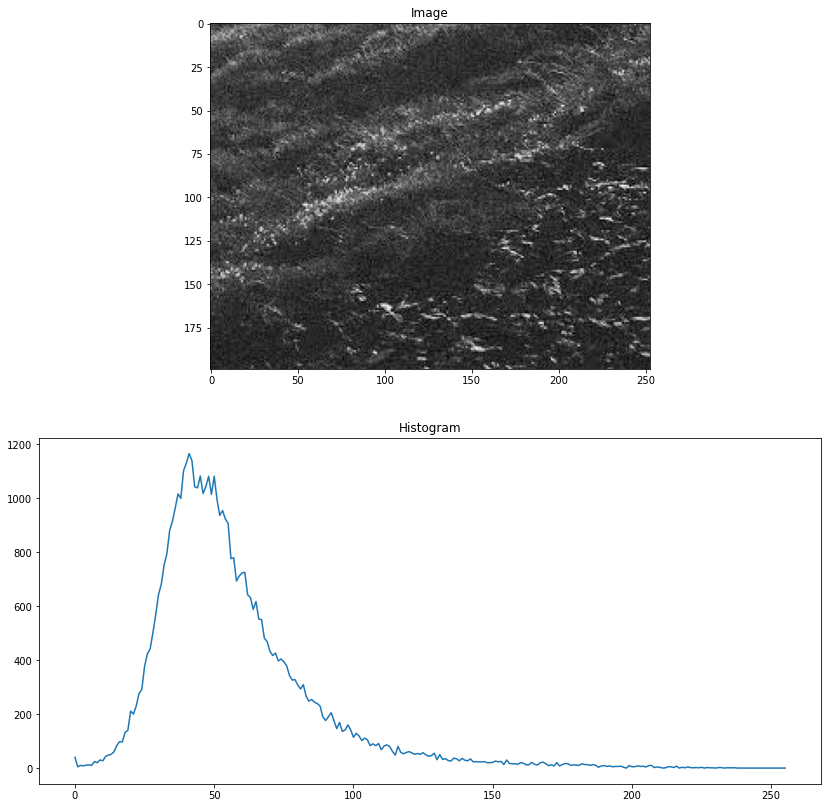

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

#initialize array subplot
size = 2
f, axarr = plt.subplots(size,1) 
f.set_figheight(size * 7)
f.set_figwidth(size * 7)
####
hist_image = cv2.imread(hist_path, 0)
#hist_image = cv2.cvtColor(hist_image, cv2.COLOR_BGR2GRAY)

axarr[0].imshow(hist_image, cmap='gray')
axarr[0].title.set_text('Image')
####
#hist_image = abs(255-hist_image)
histg = cv2.calcHist([hist_image],[0],None,[256],[0,256]) 

axarr[1].plot(histg)
axarr[1].title.set_text('Histogram')

### Histogram static not finished

plt.show()

# **Convolution**

In [ ]:
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/noise/noise.jpeg
hist_path = "noise.jpeg"

!curl -O https://raw.githubusercontent.com/Overleaff/image/main/landscape/sunFlower.jpg
filter_path = "sunFlower.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12739  100 12739    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2738k  100 2738k    0     0  18.4M      0 --:--:-- --:--:-- --:--:-- 18.4M


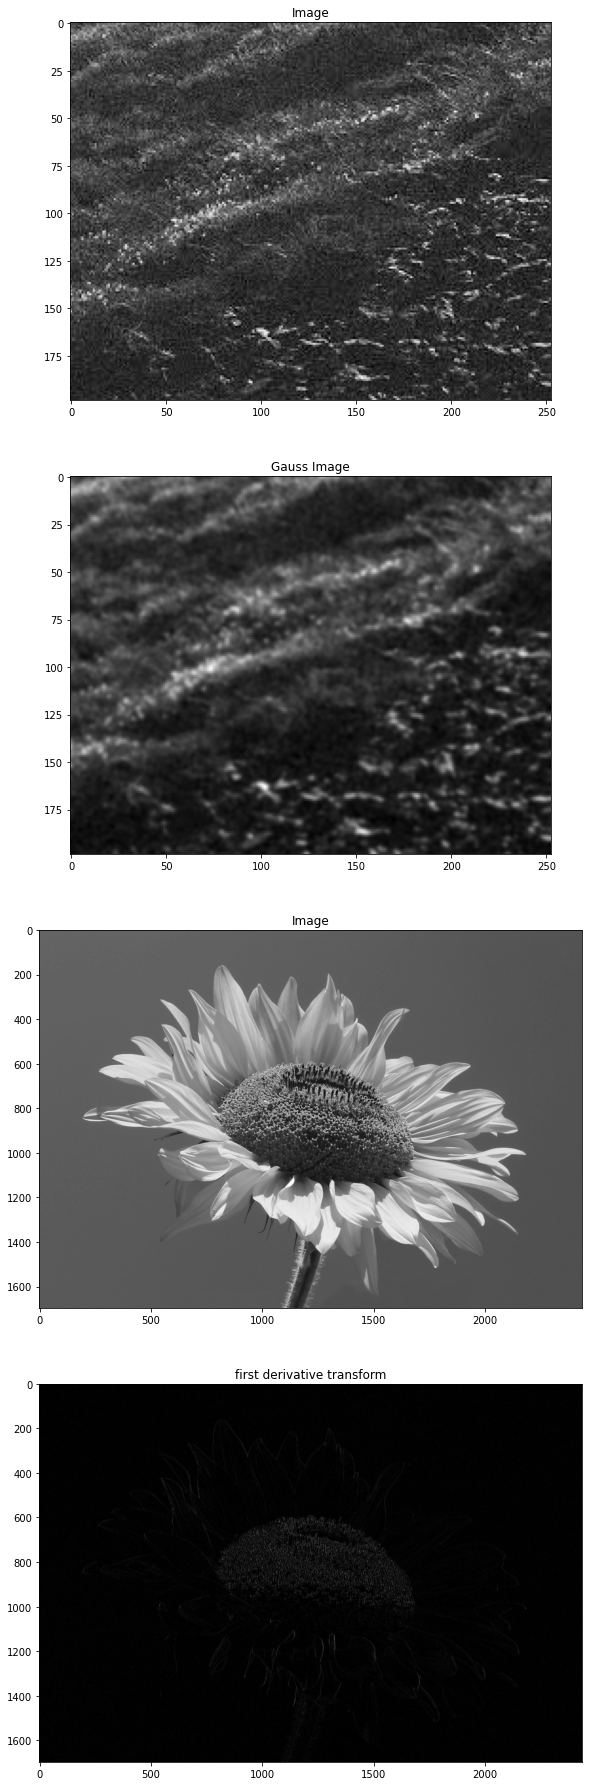

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from scipy.ndimage import gaussian_filter

#initialize array subplot
size = 4
f, axarr = plt.subplots(size,1) 
f.set_figheight(size * 8)
f.set_figwidth(size * 7)

####
image = cv2.imread(hist_path, 0)

axarr[0].imshow(image, cmap='gray')
axarr[0].title.set_text('Image')

####
gauss_image = gaussian_filter(image, sigma=1)
axarr[1].imshow(gauss_image, cmap='gray')
axarr[1].title.set_text('Gauss Image')

####
image1 = cv2.imread(filter_path, 0)

axarr[2].imshow(image1, cmap='gray')
axarr[2].title.set_text('Image')

firstorder = np.array([[1,-2,1],[0,0,0],[1,-2,1]])
firstder = cv2.filter2D(src=image1, kernel=firstorder, ddepth=-1)
axarr[3].imshow(firstder, cmap='gray')
axarr[3].title.set_text('first derivative transform')

plt.show()